In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from scipy.stats import norm, skew,kurtosis
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler  

In [10]:
cars=pd.read_csv('cars_price.csv')
cars.head()

,Unnamed: 0,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D


In [11]:
#DATA CLEANING
#dropping the 1st col as its redundant
cars.drop('Unnamed: 0', axis=1, inplace=True)

#imputing null values of numerical columns by their mean
values=2103.201676 
cars['volume(cm3)'].fillna(value=values, inplace=True)

#imputing categorical null values with mode
cars = cars.fillna(cars.mode().iloc[0])
cars.isnull().sum()
cars.head(20)

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D
5,nissan,x-trail,18900,2016,with mileage,148000.0,diesel,1600.0,black,mechanics,front-wheel drive,J
6,mitsubishi,galant,2000,1997,with mileage,378194.9,petrol,2000.0,green,auto,front-wheel drive,D
7,volkswagen,golf,5950,2002,with mileage,245000.0,diesel,1900.0,green,auto,front-wheel drive,C
8,volkswagen,passat,3200,1991,with mileage,400000.0,petrol,1800.0,burgundy,mechanics,front-wheel drive,D
9,renault,vel-satis,4700,2004,with mileage,210000.0,petrol,2000.0,gray,auto,front-wheel drive,E


In [18]:
#EDA
cars[['make', 'priceUSD']].groupby('make').max().sort_values(by='priceUSD', ascending=False)

,priceUSD
make,
bentley,195000
porsche,170000
tesla,161563
mercedes-benz,150000
bmw,128136
...,...
izh,2000
hafei,1668
proton,1200


In [16]:
cars[['segment', 'priceUSD']].groupby('segment').median().sort_values(by='priceUSD')

,priceUSD
segment,
A,3300.0
B,3500.0
C,3750.0
E,4150.0
D,4200.0
M,5500.0
F,8387.5
J,12000.0
S,12200.0


In [20]:
cars[['year', 'priceUSD', 'mileage(kilometers)']].groupby('year').mean()

,priceUSD,mileage(kilometers)
year,,
1938,12500.000000,100000.000000
1945,20000.000000,1.000000
1949,2800.000000,55555.000000
1950,3950.000000,50555.500000
1951,2000.000000,100.000000
...,...,...
2015,17212.450519,116490.552690
2016,18191.533133,104064.879028
2017,24076.100457,54319.567808


In [21]:
cars[['segment', 'priceUSD']].groupby('segment').agg(['mean', 'count'])

priceUSD       
                 mean  count
segment                     
A         4560.743976    332
B         4325.038363   3128
C         4872.817020   7509
D         6335.270722  12740
E         6238.832840   4391
F        10901.606383    658
J        14516.228697   6161
M         6916.101500   4532
S        17349.550091    549

In [22]:
cars[['make', 'model', 'priceUSD']].groupby(['make', 'model']).agg(['mean', 'count']).sort_values(by=('priceUSD', 'mean'))

priceUSD      
                              mean count
make       model                        
lancia     thema        250.000000     1
nissan     cherry       250.000000     1
renault    11           325.000000     2
volkswagen santana      334.666667     3
zaz        968          371.562500    16
...                            ...   ...
tesla      model-x   118857.333333     3
mclaren    mp4-12c   121500.000000     1
bmw        x7        122290.000000     1
bentley    mulsanne  155070.500000     2
           bentayga  182738.500000     2

[1023 rows x 2 columns]

In [23]:
cars[['fuel_type', 'make', 'priceUSD']].groupby(['fuel_type', 'make']).max().sort_values(by='priceUSD', ascending=False)

priceUSD
fuel_type  make                   
petrol     bentley          195000
           porsche          170000
electrocar tesla            161563
petrol     mercedes-benz    150000
           bmw              128136
...                            ...
           hafei              1668
diesel     luaz               1500
petrol     wartburg           1200
           proton             1200
           raf                1000

[146 rows x 1 columns]

In [24]:
cars[['fuel_type', 'priceUSD']].groupby(['fuel_type']).count().sort_values(by='priceUSD')

,priceUSD
fuel_type,
electrocar,30
diesel,14101
petrol,25869


In [25]:
cars[['fuel_type', 'priceUSD']].groupby(['fuel_type']).median().sort_values(by='priceUSD')

,priceUSD
fuel_type,
petrol,4600
diesel,6300
electrocar,15450


In [26]:
cars[['transmission', 'drive_unit', 'priceUSD']].groupby(['transmission', 'drive_unit']).mean().sort_values(by='priceUSD')

priceUSD
transmission drive_unit                              
mechanics    rear drive                   3270.396016
             front-wheel drive            4592.682079
             all-wheel drive              7222.669659
             part-time four-wheel drive   7374.939037
auto         front-wheel drive            9181.137240
             rear drive                  10582.150065
             part-time four-wheel drive  15150.518362
             all-wheel drive             18489.930091

In [27]:
cars[['color', 'segment', 'priceUSD']].groupby(['segment', 'color']).median().sort_values(by=['segment', 'priceUSD'], ascending=False)

priceUSD
segment color             
S       yellow     50975.0
        purple     32388.5
        white      24500.0
        brown      20950.0
        other      14374.5
...                    ...
A       green       2650.0
        other       2500.0
        burgundy    2350.0
        blue        2325.0
        purple      1350.0

[115 rows x 1 columns]

In [28]:
cars[['color', 'model', 'priceUSD']].groupby(['color', 'model']).median().sort_values(by=['priceUSD'], ascending=False)

priceUSD
color  model             
purple mulsanne  190141.0
other  bentayga  182738.5
white  model-x   161563.0
gray   m5        128136.0
       maybach   125000.0
...                   ...
yellow rekord       180.0
brown  santana      166.0
red    qq           157.0
other  309          150.0
       orion        150.0

[5179 rows x 1 columns]

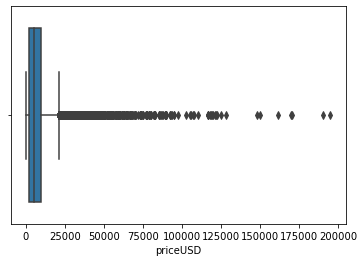

In [29]:
#Visualizations
sns.boxplot(cars['priceUSD'])

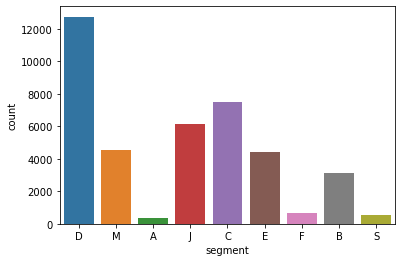

In [31]:
#categorical visualization function
def cat_visualization(dataframe, col):
    sns.countplot(dataframe[col])
    return
cat_visualization(cars, 'segment')

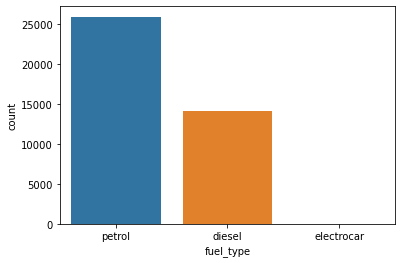

In [32]:
cat_visualization(cars, 'fuel_type')

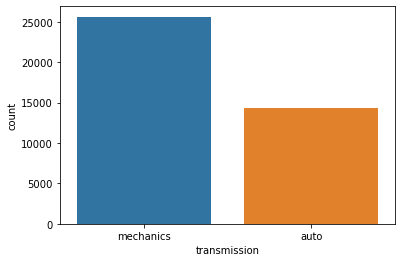

In [33]:
cat_visualization(cars, 'transmission')

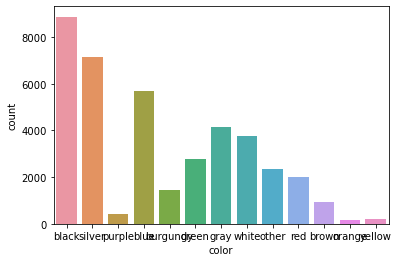

In [37]:
#cat_visualization(cars, 'color')

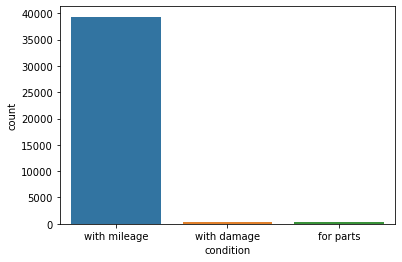

In [38]:
cat_visualization(cars, 'condition')

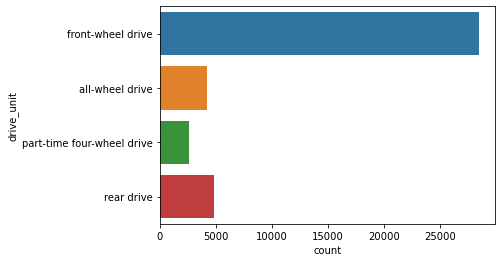

In [39]:
sns.countplot(y='drive_unit', data=cars)

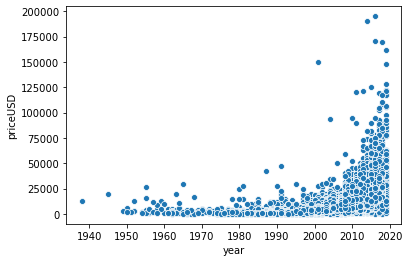

In [40]:
#scatterplots
sns.scatterplot(x=cars['year'], y=cars['priceUSD'])

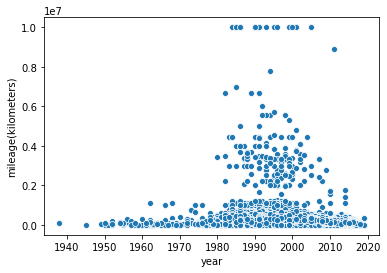

In [41]:
sns.scatterplot(x=cars['year'], y=cars['mileage(kilometers)'])

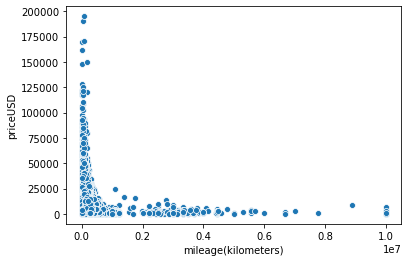

In [42]:
sns.scatterplot(x=cars['mileage(kilometers)'], y=cars['priceUSD'])

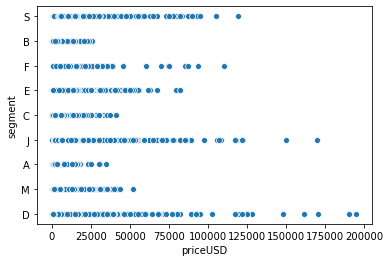

In [44]:
sns.scatterplot(x=cars['priceUSD'], y=cars['segment'])

From the EDA we can infer the following from the data:
1 Segment D is the most popular segment followed by C
2 The costliest segment type is the S type
3 Most popular fuel_type is petrol followed by diesel
4 Electrocars are much costlier as compared to petrol and diesel
5 Mechanics is the preferred transmission type rather than auto
6 Auto transmission type is costlier than mechanical transmission. 
7 The costliest is auto with all wheel drive
8 In case of drive unit front wheel drive is the most popular
9 We can observe a trend of rise in prices every year
10 Even though with every passing year the price increases the mileage of the cars is decreasing
11 The "Therma" by car maker Lancia is the cheapest in the dataset
12 The "Bentayga" by car maker Bentley is the costliest followed by "Mulsanne" by Bentley as well
13 The costlies car in the dataset is of purple color followed by white and grey.

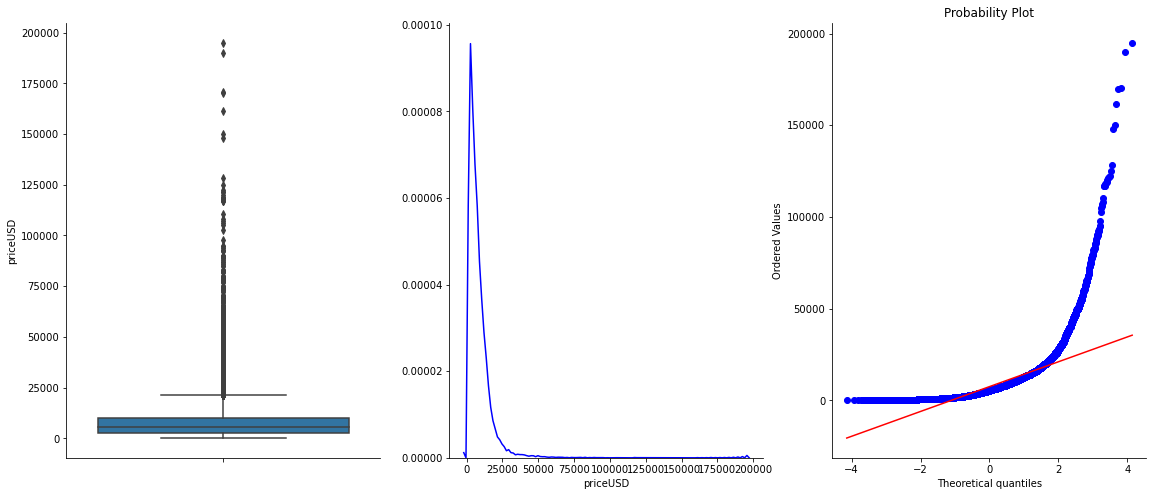

In [46]:
#Statistical analysis
#checking distribution of target variable
def data_transform(data,input):
    f,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(8,8))
    sns.boxplot(x=input, data = data, ax=ax1, orient='v')
    sns.distplot(cars[input], ax=ax2, color='blue', hist=False)
    res = stats.probplot(data[input], plot=ax3)
    f.subplots_adjust(wspace=0.22,right= 2)
    sns.despine()
    plt.show()
data_transform(cars, 'priceUSD')

In [47]:
#Our data is highly skewed to the left therfore taking the log of the data to normalize
cars['priceUSD'] = np.log1p(cars['priceUSD'])

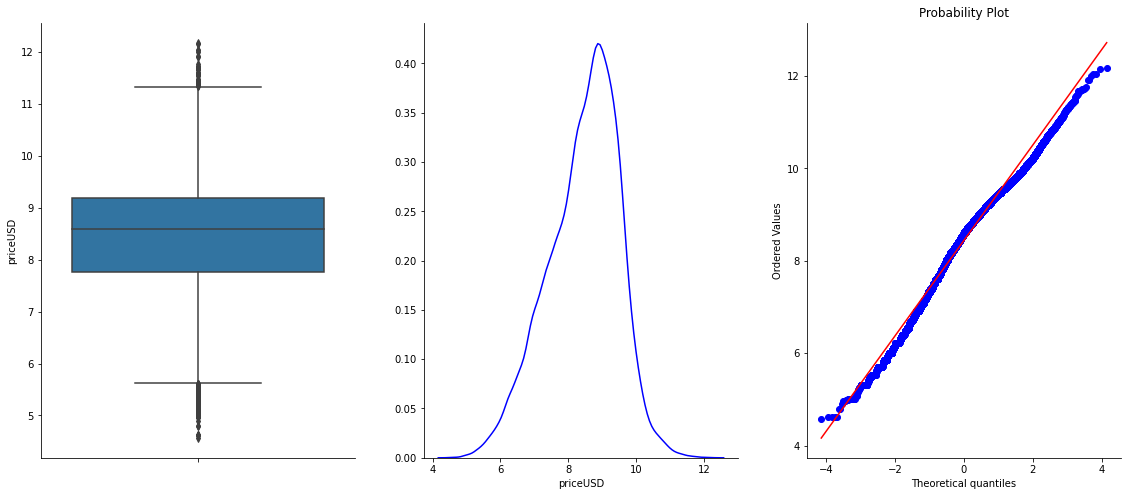

In [48]:
data_transform(cars, 'priceUSD')

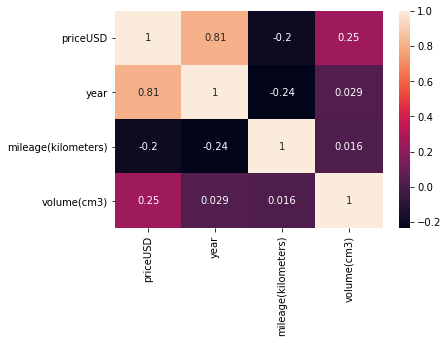

In [49]:
sns.heatmap(cars.corr(), annot=True, robust=True)

ho=mileage and price are independent 
h1=mileage and price are not independent
significance level 0.05

In [50]:
a=cars['mileage(kilometers)']
b=cars['priceUSD']
print(stats.pearsonr(a, b))

(-0.19554655551264336, 0.0)


In [51]:
#t test
stats.ttest_ind(a, b)

Ttest_indResult(statistic=153.7241858736093, pvalue=0.0)

since the p value is less than the significance level we reject the null hypothesis
thus they are related

In [52]:
#encoding categorical variables
one_hot_list=['condition', 'fuel_type', 'transmission', 'drive_unit', 'segment', 'color']
cars2=cars.copy()

cars2=pd.get_dummies(cars2, columns=one_hot_list, drop_first=True)
cars2.head()

,make,model,priceUSD,year,mileage(kilometers),volume(cm3),condition_with damage,condition_with mileage,fuel_type_electrocar,fuel_type_petrol,...,color_burgundy,color_gray,color_green,color_orange,color_other,color_purple,color_red,color_silver,color_white,color_yellow
0,honda,accord,6.338594,1993,960015.0,2000.0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,ford,fusion,8.621733,2008,172000.0,1400.0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,nissan,teana,9.024131,2008,223000.0,2500.0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
3,volkswagen,fox,8.101981,2005,140000.0,1200.0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,nissan,primera,7.804251,2002,413000.0,2200.0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [54]:
le=LabelEncoder()
cars2['make']=le.fit_transform(cars2['make'])
cars2['model']=le.fit_transform(cars2['model'])
cars2.head()

,make,model,priceUSD,year,mileage(kilometers),volume(cm3),condition_with damage,condition_with mileage,fuel_type_electrocar,fuel_type_petrol,...,color_burgundy,color_gray,color_green,color_orange,color_other,color_purple,color_red,color_silver,color_white,color_yellow
0,32,165,6.338594,1993,960015.0,2000.0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,24,423,8.621733,2008,172000.0,1400.0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,58,853,9.024131,2008,223000.0,2500.0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
3,87,417,8.101981,2005,140000.0,1200.0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,58,683,7.804251,2002,413000.0,2200.0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [55]:
y=cars2['priceUSD']
X=cars2.drop('priceUSD', axis=1)

In [56]:
#splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [59]:
#applying regression models
r2_list=[]
rmse_list=[]
def reg_model(model):
    regressor=model
    regressor.fit(X_train, y_train)
    y_pred=regressor.predict(X_test)
    r2_s=r2_score(y_test, y_pred)
    mse=mean_squared_error(y_test, y_pred)
    rmse=np.sqrt(mse)
    print(model)
    print("r2 score:", r2_s)
    print("rmse score:", rmse)
    return

In [60]:
reg_model(LinearRegression())

LinearRegression()
r2 score: 0.8082072731571007
rmse score: 0.45489114967302074


In [61]:
reg_model(DecisionTreeRegressor())

DecisionTreeRegressor()
r2 score: 0.8406274491872237
rmse score: 0.4146657659215475


In [62]:
reg_model(SVR(kernel = 'rbf'))

SVR()
r2 score: 0.8800027229375773
rmse score: 0.3598132201633122


In [63]:
reg_model(RandomForestRegressor(n_estimators=100, random_state=42)) 

RandomForestRegressor(random_state=42)
r2 score: 0.9100565558575744
rmse score: 0.31151300141142896


In [ ]:
# Random Forest gives the best R2 score and lowset RMSE followed by SVR